<a href="https://colab.research.google.com/github/kostubhagarwal/A2D_DAQ/blob/master/me303_vehicle_dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vehicle Dynamics ME303 Project**
by Oliver Dong, Adam Stokes, Nathan Woodward, Kostubh Agarwal, Gino Zhang

- Do not change the **Simulation Platform** code
- If you want to change initial conditions (eg. initial yaw rate) or vehicle parameters (eg. mass) then do so in a seperate code block
- Work in your section

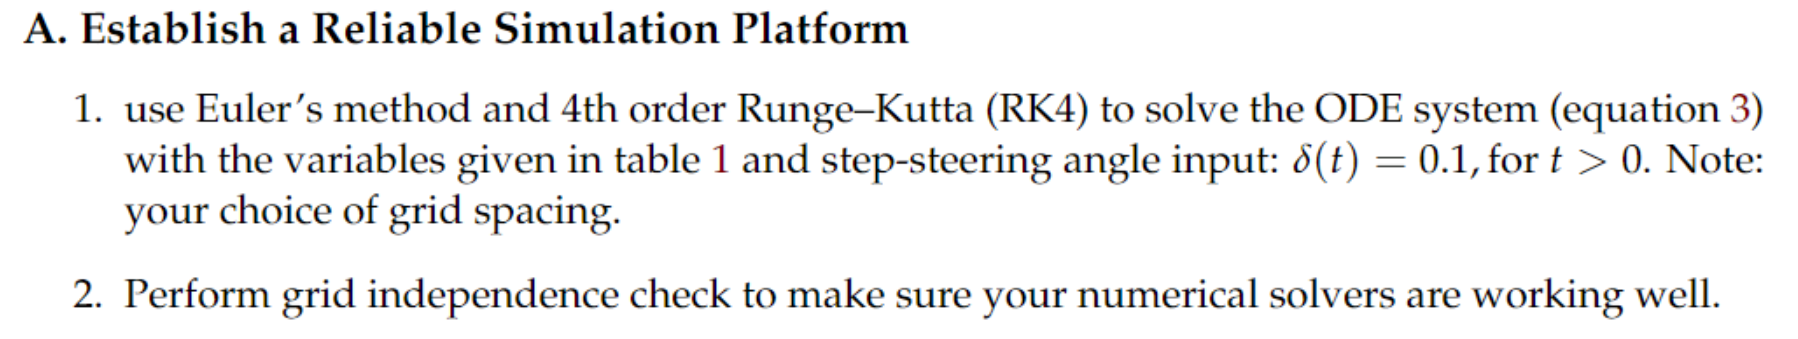

## **Simulation Platform**

In [ ]:
# Asignee: Kostubh Agarwal

import numpy as np
import matplotlib.pyplot as plt

# Vehicle parameters
m = 1400 # mass (kg)
a = 1.14 # distance of center of mass from front axle (m)
b = 1.33 # distance of center of mass from rear axle (m)
Cf = 25000 # front cornering stiffness (N/rad)
Cr = 21000 # rear cornering stiffness (N/rad)
Iz = 2420 # yaw moment of inertia (kg-m^2)
u = 75/3.6 # forward velocity (m/s)

# Initial conditions
dpsi = 0 # initial yaw rate (rad/s)
dy = 0 # initial lateral velocity (m/s)
delta = 0.1 # initial steering angle (rad)
x = np.array([dy, dpsi], dtype=np.float64) # initial state vector

# Differential equation
def differential_eqn(x):
    dy = x[0]
    dpsi = x[1]
    ddy = - (u * dpsi) - Cf * ((dy + a * dpsi)/u - delta) / m - Cr * ((dy - b * dpsi) / u) / m
    ddpsi = - (1 / Iz) * (a * Cf * ((dy + a * dpsi) / u - delta) - b * Cr * ((dy - b * dpsi) / u))
    return np.array([ddy, ddpsi], dtype=np.float64)

# Euler method
def euler(x, n, dt):
    x_values = np.zeros((n, 2), dtype=np.float64) # initialize an array to store our solutions
    dx_values = np.zeros((n, 2), dtype=np.float64) # initialize an array to store the derivatives
    for i in range(n):
        dx_values[i] = differential_eqn(x) # store the derivative
        x = x + dt * dx_values[i] # do not use x += dt * dx!!!
        x_values[i] = x # store the solution
    return x_values, dx_values

# RK4 step (slope estimation)
def rk4_step(x, dt):
    k1 = dt * differential_eqn(x)
    k2 = dt * differential_eqn(x + 0.5 * k1)
    k3 = dt * differential_eqn(x + 0.5 * k2)
    k4 = dt * differential_eqn(x + k3)
    return (k1 + 2 * k2 + 2 * k3 + k4) / 6

# RK4 method
def rk4(x, n, dt):
    x_values = np.zeros((n, 2), dtype=np.float64) # initialize an array to store our solutions
    dx_values = np.zeros((n, 2), dtype=np.float64) # initialize an array to store the derivatives
    for i in range(n):
        dx_values[i] = rk4_step(x, dt) # store the derivative
        x = x + dx_values[i] # do not use x += dx!!!
        x_values[i] = x # store the solution
    return x_values, dx_values

# Grid convergence
def grid_convergence(dt_0, n_0, conv_f, num_grid, numerical_method):
    y = np.zeros((num_grid, 2), dtype=np.float64)  # initialize an array to store our solutions of different sizes
    steps = np.zeros(num_grid, dtype = int)  # initialize an array to store the different grid spacings

    for i in range(num_grid):
        steps[i] = conv_f ** i  # calculate grid spacing factor
        dt = dt_0 / steps[i]  # calculate grid spacing
        n = n_0 * steps[i]  # calculate number of steps
        x_i, dx_i  = numerical_method(x, n, dt)  # calculate solution
        x[i] = x_i[-1]  # store final solution

    residuals = np.diff(x, axis=0)  # calculate difference between rows
    norm_residuals = np.linalg.norm(residuals, ord=2, axis=1)  # calculate norm of each row
    log_residuals = np.log(norm_residuals) / np.log(conv_f)  # log change of base
    log_steps = np.log(steps[1:]) / np.log(conv_f) # log change of base

    # Plot log_residuals against log_steps
    plt.plot(-log_steps, log_residuals, marker='o')

    # Set plot title and labels
    plt.title("Convergence Study")
    plt.xlabel("Log Steps")
    plt.ylabel("Log Residuals")

    # Show the plot
    plt.show()

    return log_steps, log_residuals

In [ ]:
# A.1
euler(x, 1000, 0.01)
rk4(x, 1000, 0.01)

(array([[  0.01650127,   0.01169495],
        [  0.03034158,   0.02322777],
        [  0.04159586,   0.03460098],
        ...,
        [-11.3706746 ,   0.94568261],
        [-11.37068763,   0.94568298],
        [-11.37070054,   0.94568335]]),
 array([[ 1.65012653e-02,  1.16949463e-02],
        [ 1.38403153e-02,  1.15328206e-02],
        [ 1.12542837e-02,  1.13732133e-02],
        ...,
        [-1.31636058e-05,  3.74554845e-07],
        [-1.30347373e-05,  3.70887709e-07],
        [-1.29071303e-05,  3.67256478e-07]]))

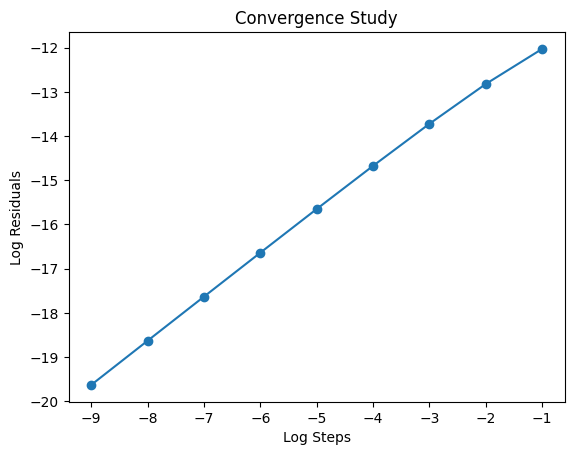

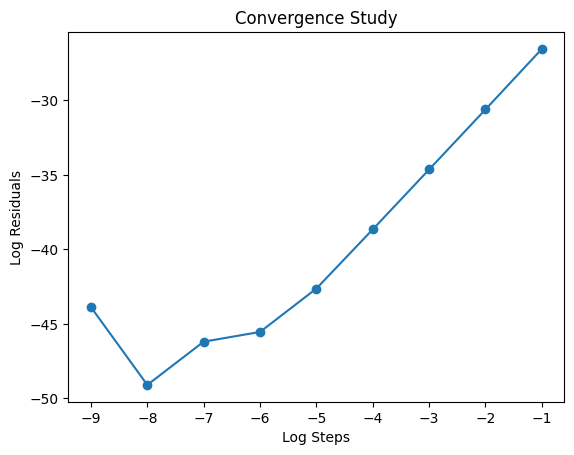

(array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([-26.54285351, -30.60395572, -34.63445902, -38.65401352,
        -42.62443067, -45.5382434 , -46.19057785, -49.0931094 ,
        -43.86979748]))

In [ ]:
# A.2 (Kostubh Agarwal)
grid_convergence(0.1, 100, 2, 10, euler)
grid_convergence(0.1, 100, 2, 10, rk4)

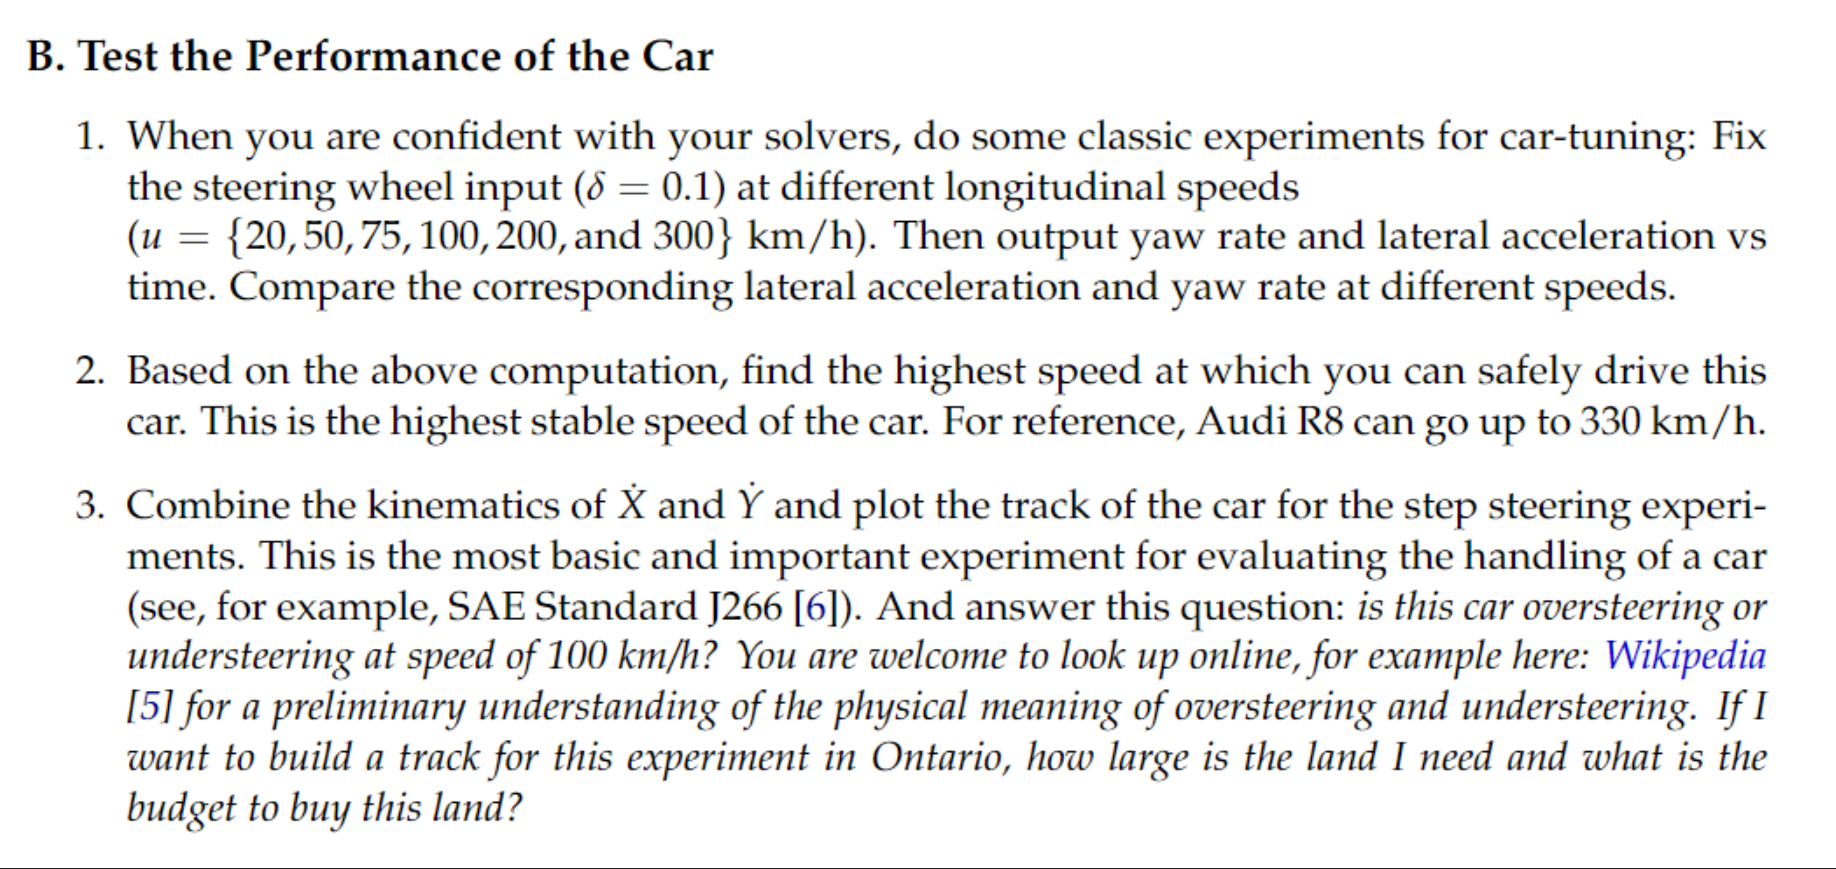

'\nactual_y = []\nfor t in range(steps+1):\n  s = t*timestep\n  actual_y.append(-13.0964 * 2.71828**(-1.9745 * s) + 24.4684 * 2.71828**(-0.9839 * s) - 11.3720)\n'

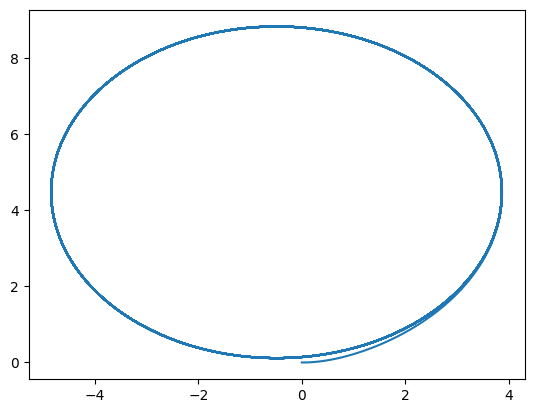

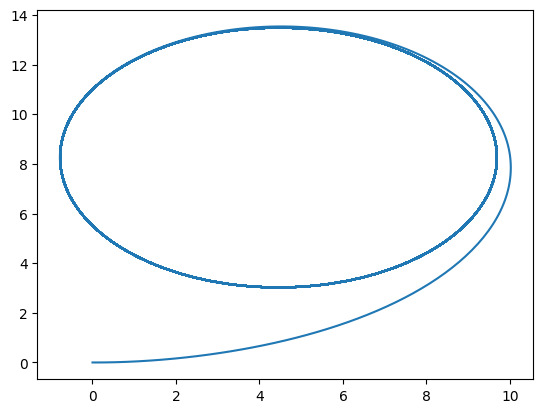

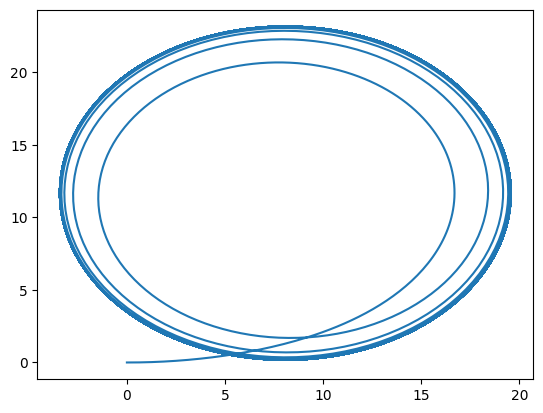

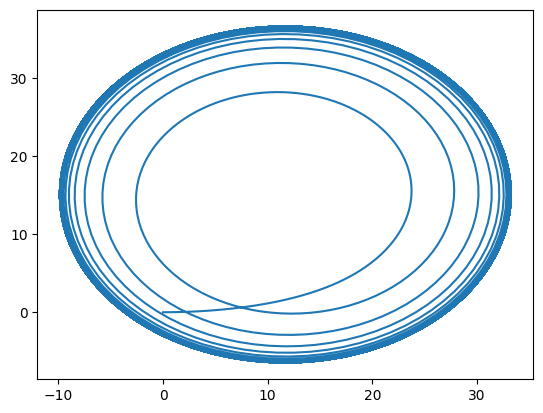

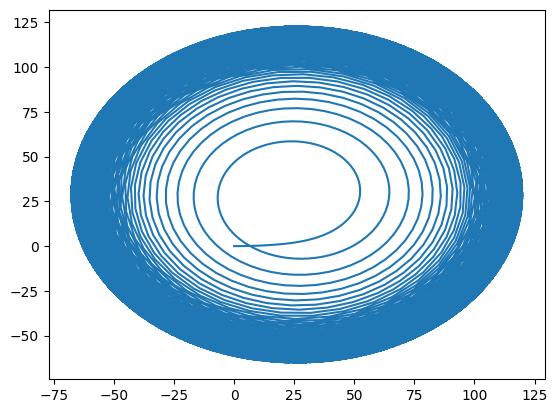

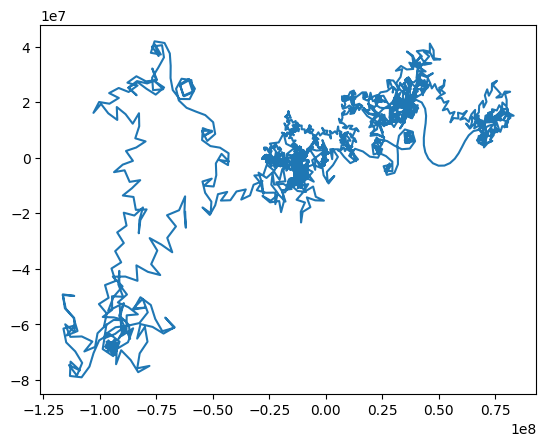

In [ ]:
from numpy.ma import fromflex
import math
# Asignee: Adam Stokes

#1. 6 graphs, testing variable speed with constant steering radius
#output lateral acceleration and yaw rate wrt time of the turn.

v = (20/3.6,50/3.6,75/3.6,100/3.6,200/3.6,300/3.6)
timestep = 0.01
steps = 10000
delta = 0.6

#calc list for time
time = []
for i in range(steps+1):
  time.append(timestep*i)


"""
#A

for i in range(6):
  u = v[i]
  end_x, fx, ffx = rk4(x, steps, timestep)#get function values
  fy = fx[0]
  fpsi = fx[1]
  ffy = ffx[0]
  ffpsi = ffx[1]

  plt.figure()
  plt.plot(time,ffy, label = "Laterial Acceleration (m/s^2)")
  plt.plot(time,fpsi, label = "Yaw Rate (rad/s)")
  plt.tight_layout()
  plt.xlabel("Time (s)")
  plt.ylabel("Magnitude")
  plt.title("Response with u = %d km/h" % (u*3.6))
  plt.grid(True)
  plt.legend(loc = "lower right", title = 'Legend')
"""

"""
#B
#planning to evaluate acceleration to see if it tends to zero after a certain amount of time

e_timestep = 0.1
e_steps = 20000
max_v = 0
for i in range(100):
  u = (200 + i)/3.6
  end_x, fx, ffx = rk4(x, e_steps, e_timestep)#get function values
  e_ffy = ffx[0]
  print("u: %f value: %f" % (u,e_ffy[e_steps]))
  if abs(e_ffy[e_steps]) < 0.01 and u > max_v:
    mav_v = u
  if abs(e_ffy[e_steps]) > 1:
    break
print("MAX V: %f" % (mav_v*3.6))
maxv = 225
"""

"""
#C
#have to make new euler method nm, since initial only works for ddy to dy

for i in range(6):
  u = v[i]
  end_x, fx, ffx = rk4(x, steps, timestep)#get function values
  fy = fx[0]
  fpsi = fx[1]
  ffy = ffx[0]
  ffpsi = ffx[1]

  #do euler for psi, x and y
  #psi = rk4_known(x, steps, timestep, fpsi)

  psi = [0]
  x_v = [0]
  y_v = [0]
  x_p = [0]
  y_p = [0]
  #function for psi(t)
  for i in range(steps):
    psi.append(psi[i] + (timestep)*(fpsi[i]))


  for i in range(steps):
      x_v.append(u*math.cos(psi[i])-(fy[i]+a*fpsi[i])*math.sin(psi[i]))
      y_v.append(u*math.sin(psi[i])+(fy[i]+a*fpsi[i])*math.cos(psi[i]))

  for i in range(steps):
    x_p.append(x_p[i] + (timestep)*(x_v[i]))
    y_p.append(y_p[i] + (timestep)*(y_v[i]))

  plt.figure()
  plt.plot(x_p,y_p)

"""


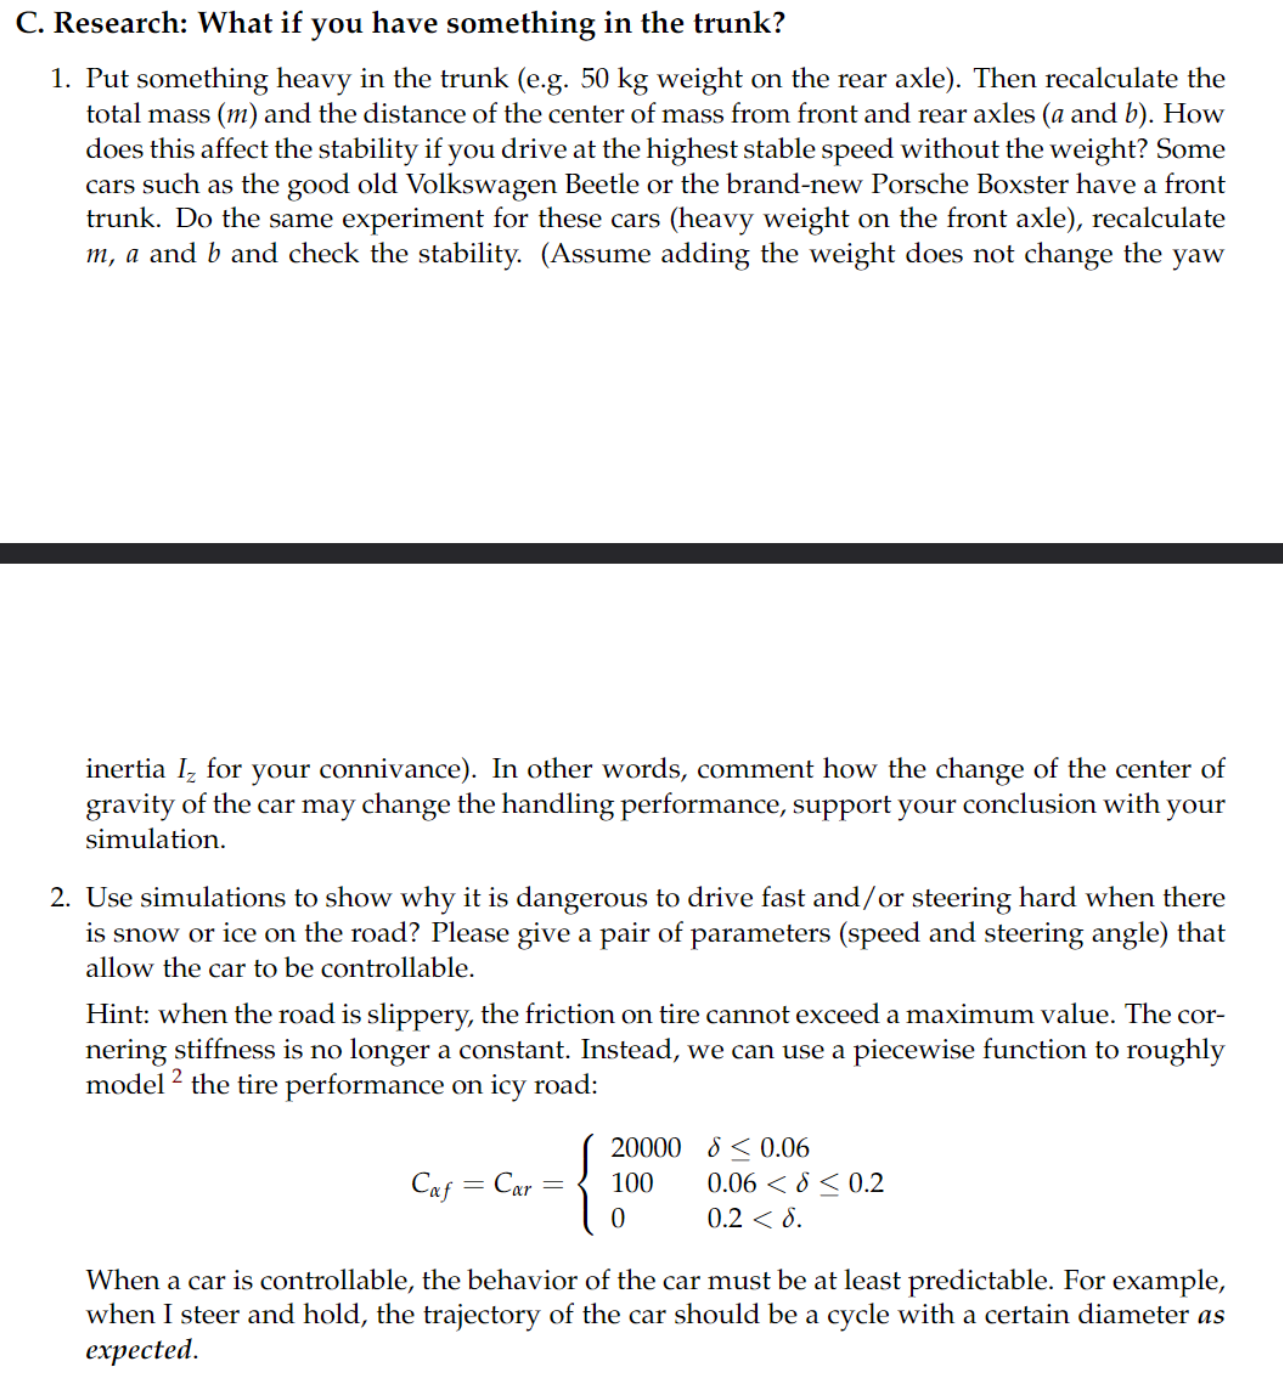

In [ ]:
# Asignee: Oliver

#1
m_t = 1450 #new total mass with weight in rear or front axle (kg)
m_i = 1400 # initial weight of car without added weight (kg)
m_w = 50 # mass of new weight (kg)

# for increased rear axle weight
# taking rear axle as reference point for new center of mass calculation

x_1r = 1.33 # distance of CM from rear axle in original system without weight (m)
x_2r = 0 # if weight is placed at rear trunk, distance from ref. is equal to 0 (m)

b_rear = (m_i*x_r1+m_w*x_r2)/m_t # new distance of CM from rear axle (m)
a_rear =  a + b - b_rear # distance of front axle from CM (m)

# for increased front axle weight
# taking rear axle as reference point for new center of mass calculation

x_1f = 1.33 # distance of cm from rear axle in original system without weight
x_2f = a + b # distance of weight from ref.

b_front = (m_i*x_1f+m_w*x_2f)/m_t # new distance of CM from rear axle (m)
a_front = a + b - b_front # distance of front axle from CM (m)

#2
#Case 1: sigma =< 0.06
c = 20000

#Case 2: 0.06 < sigma =< 0.2
c = 100

#Case 3: 0.2 < sigma
c = 0

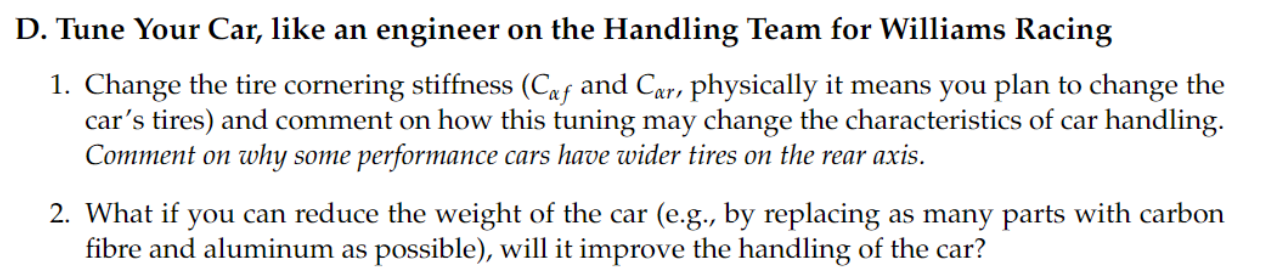

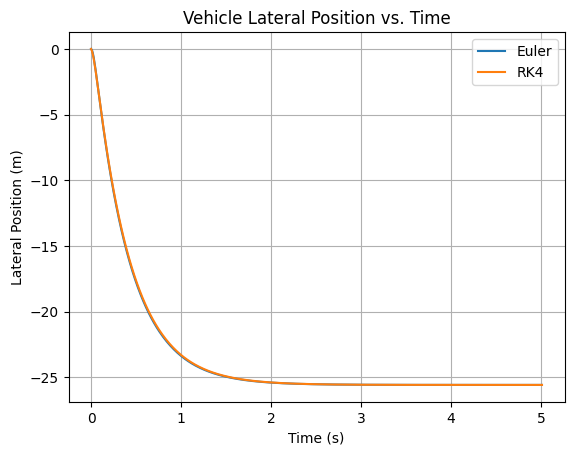

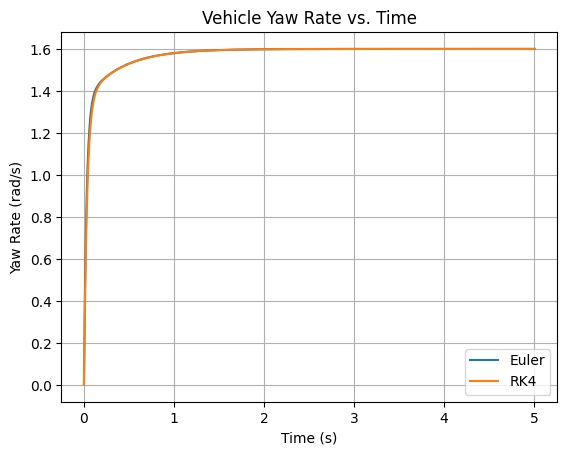

In [ ]:
# Asignee: Nathan

import numpy as np
import matplotlib.pyplot as plt

# Vehicle parameters
m = 1400  # mass (kg)
a = 1.14  # distance of center of mass from front axle (m)
b = 1.33  # distance of center of mass from rear axle (m)
Caf = 25000  # front tire cornering stiffness (N/rad)
Car = 21000  # rear tire cornering stiffness (N/rad)
Iz = 2420  # yaw inertia, kg-m^2
u = 75/3.6  # velocity in x-direction, m/s

# simulation parameters
t_start = 0  # start time (s)
t_end = 5  # end time (s)
delta_t = 0.01  # time step (s)

# This function solves the system of equations using Euler's method
def solve_ode_euler():
    t = [t_start]
    y = [[0, 0]]
    while t[-1] < t_end:
        t.append(t[-1] + delta_t)
        # Calculate the derivatives dy/dt using Euler's method
        dy = [(-Caf + Car) / m * y[-1][0] - (a * Caf + b * Car) / m * y[-1][1] - (a * Caf - b * Car) / m * u,
              (-a * Caf + b * Car) / Iz * y[-1][0] - (a**2 * Caf + b**2 * Car) / Iz * y[-1][1] - (a**2 * Caf - b**2 * Car) / Iz * u]
        # Calculate the new state variables y(t+dt) using Euler's method
        y.append([y[-1][0] + dy[0] * delta_t, y[-1][1] + dy[1] * delta_t])
    return t, np.array(y)

# This function solves the system of equations using Runge-Kutta 4th order method
def solve_ode_rk4():
    t = [t_start]
    y = [[0, 0]]
    while t[-1] < t_end:
        t.append(t[-1] + delta_t)
        # Calculate the intermediate derivatives k1, k2, k3, and k4 using Runge-Kutta 4th order method
        k1 = [(-Caf + Car) / m * y[-1][0] - (a * Caf + b * Car) / m * y[-1][1] - (a * Caf - b * Car) / m * u,
              (-a * Caf + b * Car) / Iz * y[-1][0] - (a**2 * Caf + b**2 * Car) / Iz * y[-1][1] - (a**2 * Caf - b**2 * Car) / Iz * u]
        k2 = [(-Caf + Car) / m * (y[-1][0] + k1[0] * delta_t / 2) - (a * Caf + b * Car) / m * (y[-1][1] + k1[1] * delta_t / 2) - (a * Caf - b * Car) / m * u,
              (-a * Caf + b * Car) / Iz * (y[-1][0] + k1[0] * delta_t / 2) - (a**2 * Caf + b**2 * Car) / Iz * (y[-1][1] + k1[1] * delta_t / 2) - (a**2 * Caf - b**2 * Car) / Iz * u]
        k3 = [(-Caf + Car) / m * (y[-1][0] + k2[0] * delta_t / 2) - (a * Caf + b * Car) / m * (y[-1][1] + k2[1] * delta_t / 2) - (a * Caf - b * Car) / m * u,
              (-a * Caf + b * Car) / Iz * (y[-1][0] + k2[0] * delta_t / 2) - (a**2 * Caf + b**2 * Car) / Iz * (y[-1][1] + k2[1] * delta_t / 2) - (a**2 * Caf - b**2 * Car) / Iz * u]
        k4 = [(-Caf + Car) / m * (y[-1][0] + k3[0] * delta_t) - (a * Caf + b * Car) / m * (y[-1][1] + k3[1] * delta_t) - (a * Caf - b * Car) / m * u,
              (-a * Caf + b * Car) / Iz * (y[-1][0] + k3[0] * delta_t) - (a**2 * Caf + b**2 * Car) / Iz * (y[-1][1] + k3[1] * delta_t) - (a**2 * Caf - b**2 * Car) / Iz * u]
        # Calculate the new state variables y(t+dt) using Runge-Kutta 4th order method
        dy = [(k1[0] + 2 * k2[0] + 2 * k3[0] + k4[0]) * delta_t / 6, (k1[1] + 2 * k2[1] + 2 * k3[1] + k4[1]) * delta_t / 6]
        y.append([y[-1][0] + dy[0], y[-1][1] + dy[1]])
    return t, np.array(y)

# Solve ODE using Euler's method
t_euler, sol_euler = solve_ode_euler()

# Solve ODE using Runge-Kutta 4th order method
t_rk4, sol_rk4 = solve_ode_rk4()

# Plot results: Lateral Position vs. Time
plt.figure()
plt.plot(t_euler, sol_euler[:, 0], label='Euler')
plt.plot(t_rk4, sol_rk4[:, 0], label='RK4')
plt.xlabel('Time (s)')
plt.ylabel('Lateral Position (m)')
plt.legend()
plt.title('Vehicle Lateral Position vs. Time')
plt.grid(True)

# Plot results: Yaw Rate vs. Time
plt.figure()
plt.plot(t_euler, sol_euler[:, 1], label='Euler')
plt.plot(t_rk4, sol_rk4[:, 1], label='RK4')
plt.xlabel('Time (s)')
plt.ylabel('Yaw Rate (rad/s)')
plt.legend()
plt.title('Vehicle Yaw Rate vs. Time')
plt.grid(True)

# Show the plots
plt.show()


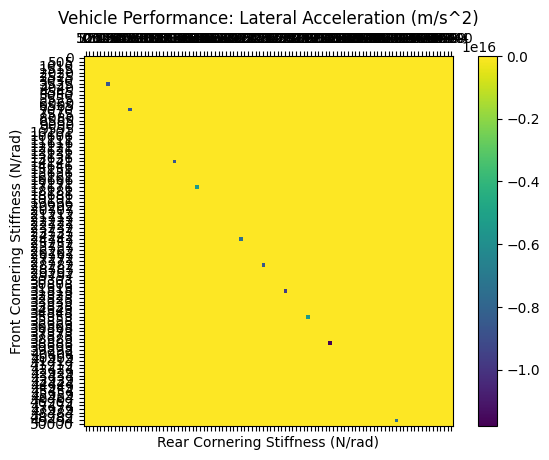

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vehicle_performance(front_stiffness_range, rear_stiffness_range):
    # Define other vehicle parameters
    m = 1400  # mass (kg)
    a = 1.14  # distance of center of mass from front axle (m)
    b = 1.33  # distance of center of mass from rear axle (m)
    u = 75 / 3.6  # velocity in x direction (m/s)

    # Define the performance metric
    def calculate_performance(front_stiffness, rear_stiffness):
        Caf = front_stiffness
        Car = rear_stiffness

        denominator = np.sqrt((m*a*Caf)**2 + (m*b*Car)**2)
        if denominator == 0 or (m*a*Caf - m*b*Car) == 0:
            R = 0
        else:
            R = u**2 / (denominator / (m*a*Caf - m*b*Car))

        if R == 0:
            a_lat = 0
        else:
            a_lat = u**2 / R

        return a_lat

    # Initialize arrays to store results
    performance_results = np.zeros((len(front_stiffness_range), len(rear_stiffness_range)))

    # Calculate performance for each combination of front and rear stiffness
    for i, front_stiffness in enumerate(front_stiffness_range):
        for j, rear_stiffness in enumerate(rear_stiffness_range):
            performance_results[i, j] = calculate_performance(front_stiffness, rear_stiffness)

    # Plot the results
    fig, ax = plt.subplots()
    cax = ax.matshow(performance_results, cmap='viridis')
    fig.colorbar(cax)

    # Set labels and title
    ax.set_xlabel('Rear Cornering Stiffness (N/rad)')
    ax.set_ylabel('Front Cornering Stiffness (N/rad)')
    ax.set_title('Vehicle Performance: Lateral Acceleration (m/s^2)')

    # Set tick labels
    ax.set_xticks(np.arange(len(rear_stiffness_range)))
    ax.set_yticks(np.arange(len(front_stiffness_range)))
    ax.set_xticklabels([f'{int(x)}' for x in rear_stiffness_range])
    ax.set_yticklabels([f'{int(x)}' for x in front_stiffness_range])

    # Show the plot
    plt.show()

front_stiffness_range = np.linspace(0, 50000, 100)
rear_stiffness_range = np.linspace(0, 50000, 100)

plot_vehicle_performance(front_stiffness_range, rear_stiffness_range)


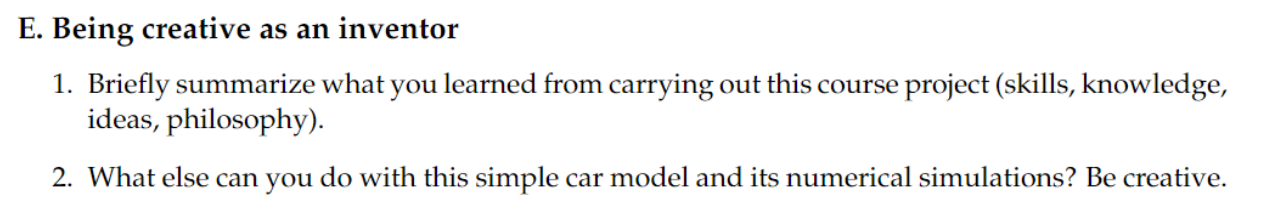

In [ ]:
# Asignee: Kostubh
max_Cf = 50000
max_Cr = 50000

for i in length(max_Cf):
  print(i)



NameError: ignored

#### P1.Warmup and P2.F is to be completed in the report